Mean Squared Error for FPT.csv: 14.338304770552838


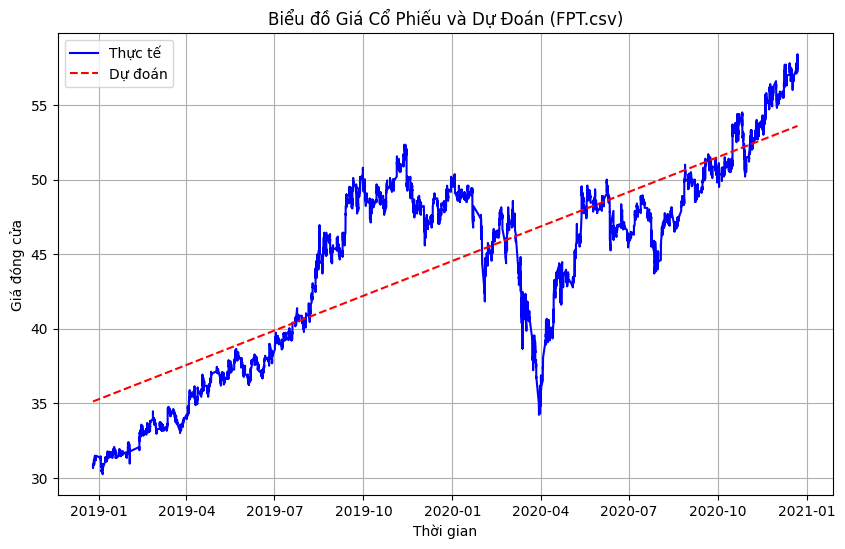

Mean Squared Error for PNJ.csv: 81.7326576437784


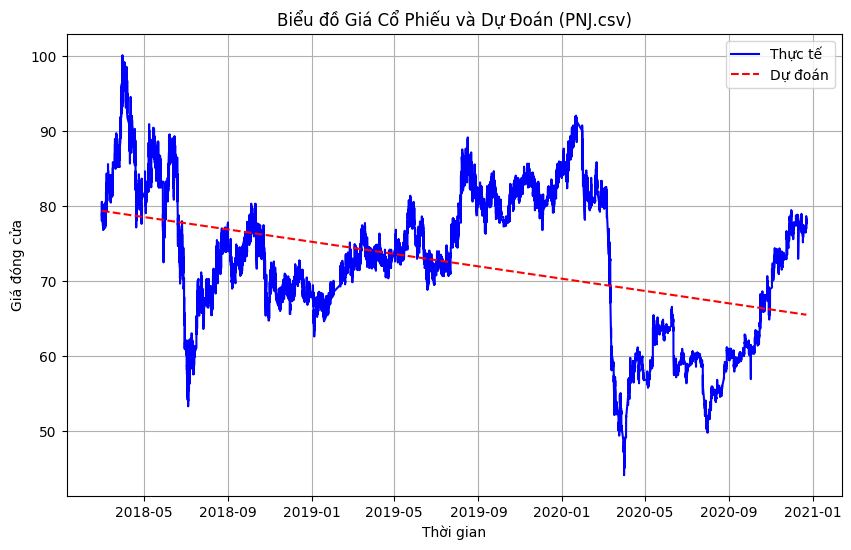

Mean Squared Error for VIC.csv: 108.08596331983628


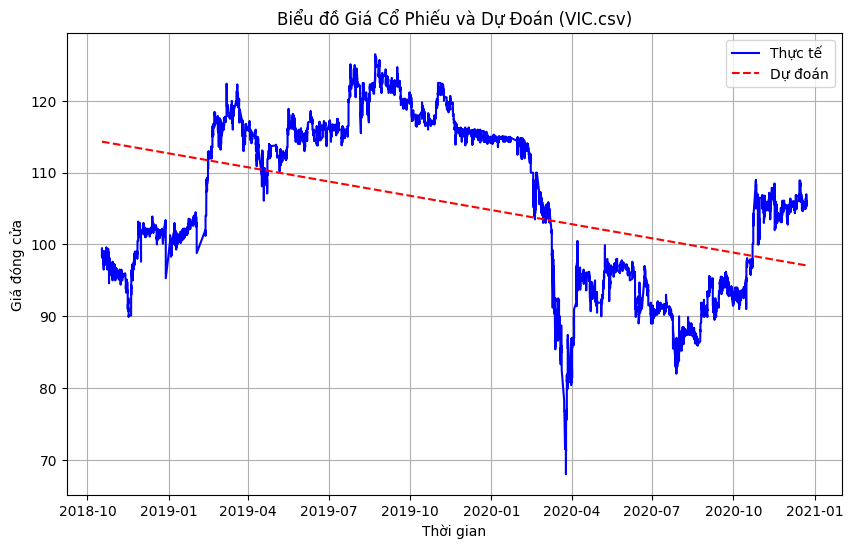

Mean Squared Error for MSN.csv: 123.032709437381


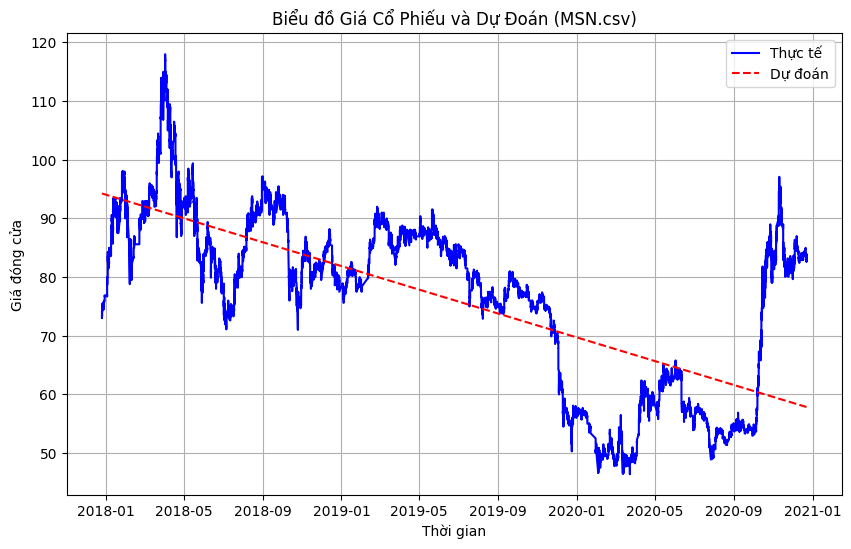

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
files = ['FPT.csv', 'PNJ.csv', 'VIC.csv', 'MSN.csv']
for file_path in files:
    try:
        df = pd.read_csv(file_path, parse_dates=['Date/Time'])
        df = df[['Date/Time', 'Close']]
        df.columns = ['Date', 'Close']
        df['Time'] = (df['Date'] - df['Date'].min()).dt.total_seconds()
        X = df[['Time']]
        y = df['Close']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error for {file_path}: {mse}')
        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df['Close'], label='Thực tế', color='blue')
        predicted_data = model.predict(df[['Time']])
        plt.plot(df['Date'], predicted_data, label='Dự đoán', color='red', linestyle='dashed')
        plt.title(f'Biểu đồ Giá Cổ Phiếu và Dự Đoán ({file_path})')
        plt.xlabel('Thời gian')
        plt.ylabel('Giá đóng cửa')
        plt.legend()
        plt.grid(True)
        plt.show()
    except FileNotFoundError:
        print(f'Error: File not found - {file_path}')
    except Exception as e:
        print(f'Error processing {file_path}: {e}')
